# Projeto de Regressão Linear

Parabéns! Foi contratado para trabalhar numa empresa de e-commerce sediada em Nova York, que vende roupa online, mas também tem consultoria em estilo e vestuário na loja. Os clientes entram na loja e são aconselhados por um estilista pessoal. Voltam para casa e encomendam a roupa pretendida através do site ou da app.

A empresa quer decidir se deve investir na app ou no site.

Siga as etapas para analisar os dados do cliente.

## Imports
** Importe pandas, numpy, matplotlib e seaborn. **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Obter dados

Trabalharemos com o ficheiro EcommerceCustomers. Possui informações do cliente, como Email, Endereço e sua cor Avatar. Também possui colunas de valores numéricos:.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.

** Ler o ficheiro EcommerceCustomers para um DataFrame chamado clientes. **

In [2]:
caminho_ficheiro = r'C:\Users\Pedro\Desktop\UFCD 10810\Projecto1\EcommerceCustomers.csv'
clientes = pd.read_csv(caminho_ficheiro, encoding='utf-8')
print(clientes.head())


                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    

** Verifique o cabeçalho dos clientes e confira os seus métodos info () e describe(). **

In [3]:
print(clientes.head())
print(clientes.info())
print(clientes.describe())

                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    

In [6]:
print(clientes.describe())

       Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462  


In [7]:
print(clientes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None


## Análise de dados exploratória

** Use seaborn para criar um pairplot e comparar as relações no conjunto de dados **

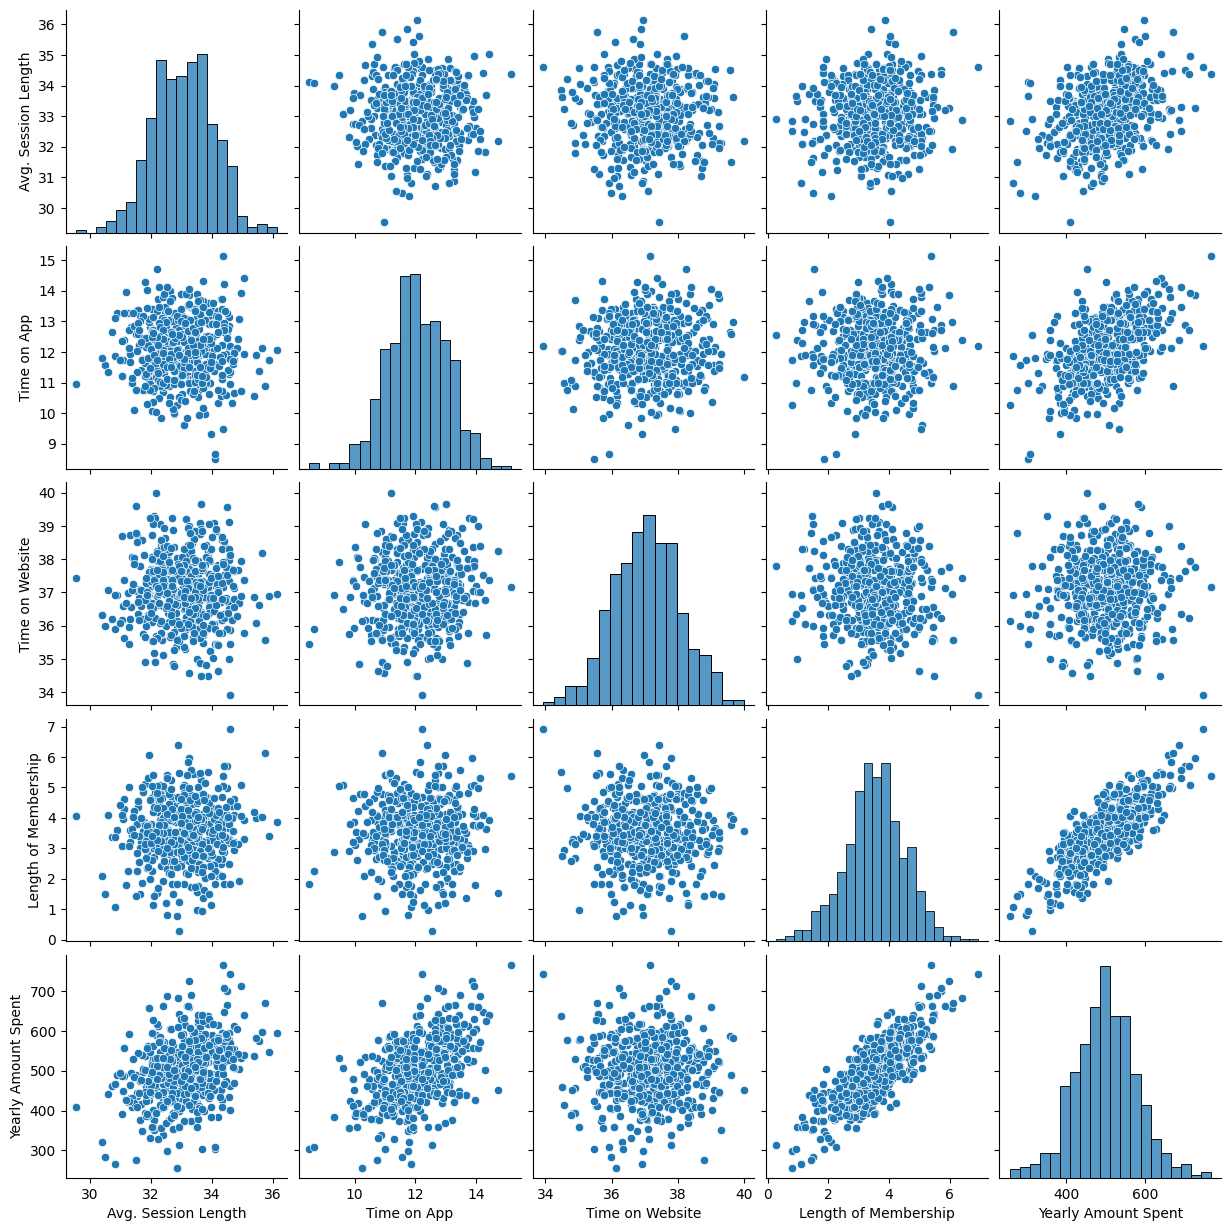

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(clientes)

plt.show()

** Neste gráfico, o que parece ser a caraterística mais correlacionada com o valor anual gasto (Yearly Amount Spent)? **

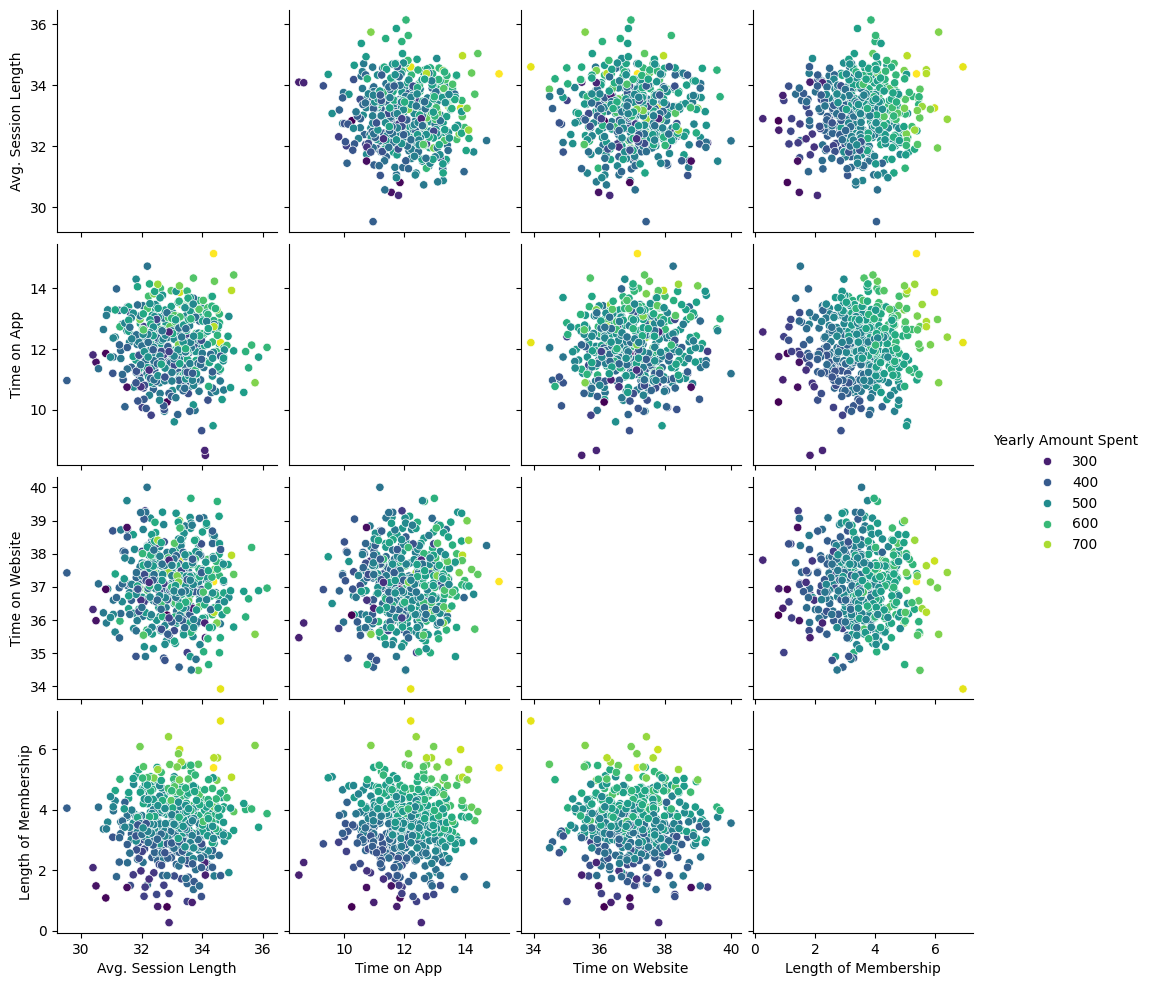

In [10]:
sns.pairplot(clientes, hue="Yearly Amount Spent", palette="viridis")

plt.show()

## Treinar e testar os dados

Agora que explorámos um pouco os dados, vamos avançar e dividir os dados em conjuntos de treino e teste.
** Defina uma variável X igual a todas as caraterísticas numéricas dos clientes e uma variável Y igual à coluna Valor Anual Gasto (Yearly Amount Spent). **

In [11]:
X = clientes[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [12]:
Y = clientes['Yearly Amount Spent']

** Use train_test_split da sklearn para dividir os dados em conjuntos de treino e teste. Defina test_size = 0.3 e random_state = 101 **

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [14]:
print(f"Tamanho do conjunto de treino (X_train, Y_train): {X_train.shape}, {Y_train.shape}")
print(f"Tamanho do conjunto de teste (X_test, Y_test): {X_test.shape}, {Y_test.shape}")

Tamanho do conjunto de treino (X_train, Y_train): (350, 4), (350,)
Tamanho do conjunto de teste (X_test, Y_test): (150, 4), (150,)


## Treinar o modelo

** Importe LinearRegression do sklearn.linear_model **

In [15]:
from sklearn.linear_model import LinearRegression

** Crie uma instância de um modelo LinearRegression () chamado lm. **

In [16]:
lm = LinearRegression()

** Treine lm nos dados de treino. **

In [17]:
lm.fit(X_train, Y_train)

LinearRegression()

**Faça um Print dos coeficientes do modelo**

In [18]:
print("Coeficientes do modelo:", lm.coef_)

Coeficientes do modelo: [25.98154972 38.59015875  0.19040528 61.27909654]


## Previsão de dados de teste
Agora que nos ajustámos ao modelo, vamos avaliar o seu desempenho ao prever os valores de teste!

** Use lm.predict() para prever o conjunto X_test dos dados. **

In [19]:
y_pred = lm.predict(X_test)

print("Previsões para o conjunto de teste:", y_pred)

Previsões para o conjunto de teste: [456.44186104 402.72005312 409.2531539  591.4310343  590.01437275
 548.82396607 577.59737969 715.44428115 473.7893446  545.9211364
 337.8580314  500.38506697 552.93478041 409.6038964  765.52590754
 545.83973731 693.25969124 507.32416226 573.10533175 573.2076631
 397.44989709 555.0985107  458.19868141 482.66899911 559.2655959
 413.00946082 532.25727408 377.65464817 535.0209653  447.80070905
 595.54339577 667.14347072 511.96042791 573.30433971 505.02260887
 565.30254655 460.38785393 449.74727868 422.87193429 456.55615271
 598.10493696 449.64517443 615.34948995 511.88078685 504.37568058
 515.95249276 568.64597718 551.61444684 356.5552241  464.9759817
 481.66007708 534.2220025  256.28674001 505.30810714 520.01844434
 315.0298707  501.98080155 387.03842642 472.97419543 432.8704675
 539.79082198 590.03070739 752.86997652 558.27858232 523.71988382
 431.77690078 425.38411902 518.75571466 641.9667215  481.84855126
 549.69830187 380.93738919 555.18178277 403.4

** Crie um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos. **

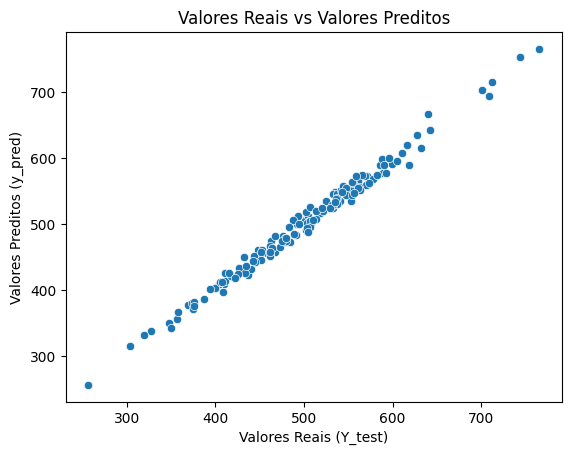

In [20]:
sns.scatterplot(x=Y_test, y=y_pred)

plt.title('Valores Reais vs Valores Preditos')
plt.xlabel('Valores Reais (Y_test)')
plt.ylabel('Valores Preditos (y_pred)')

plt.show()

## Avaliar o Modelo

Vamos avaliar o desempenho do nosso modelo.

** Calcule o erro absoluto médio, o erro quadrado médio e o erro quadrado médio da raiz. **

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calcular o Erro Absoluto Médio (MAE)
mae = mean_absolute_error(Y_test, y_pred)

# Calcular o Erro Quadrado Médio (MSE)
mse = mean_squared_error(Y_test, y_pred)

# Calcular a Raiz do Erro Quadrado Médio (RMSE)
rmse = np.sqrt(mse)

print(f"Erro Absoluto Médio (MAE): {mae}")
print(f"Erro Quadrado Médio (MSE): {mse}")
print(f"Raiz do Erro Quadrado Médio (RMSE): {rmse}")

Erro Absoluto Médio (MAE): 7.228148653430826
Erro Quadrado Médio (MSE): 79.81305165097427
Raiz do Erro Quadrado Médio (RMSE): 8.933815066978624


## Conclusão
Ainda desejamos descobrir a resposta à pergunta original. Concentramos-nos no desenvolvimento de apps móveis ou de sites? Ou talvez isto realmente não importe e o tempo como membro é o que é realmente importante? Vamos ver se podemos interpretar os coeficientes para ter uma idéia.

** Recrie o quadro de dados abaixo. **

In [22]:
coefs = {
    'Avg. Session Length': lm.coef_[0],
    'Time on App': lm.coef_[1],
    'Time on Website': lm.coef_[2],
    'Length of Membership': lm.coef_[3]
}

coefs_df = pd.DataFrame(list(coefs.items()), columns=['Feature', 'Coef'])

print(coefs_df)

                Feature       Coef
0   Avg. Session Length  25.981550
1           Time on App  38.590159
2       Time on Website   0.190405
3  Length of Membership  61.279097


** Como é que pode interpretar estes coeficientes? **

In [23]:
coefs = {
    'Avg. Session Length': lm.coef_[0],
    'Time on App': lm.coef_[1],
    'Time on Website': lm.coef_[2],
    'Length of Membership': lm.coef_[3]
}

for feature, coef in coefs.items():
    print(f"Feature: {feature}")
    print(f"Coeficiente: {coef}")
    
    if feature == 'Avg. Session Length':
        print(f"Interpretação: Por cada aumento de 1 unidade no tempo médio de sessão, o valor anual gasto aumenta em {coef:.2f} unidades.")
    elif feature == 'Time on App':
        print(f"Interpretação: Por cada aumento de 1 minuto no tempo gasto no app, o valor anual gasto aumenta em {coef:.2f} unidades.")
    elif feature == 'Time on Website':
        print(f"Interpretação: Por cada aumento de 1 minuto no tempo gasto no site, o valor anual gasto aumenta em {coef:.2f} unidades.")
    elif feature == 'Length of Membership':
        print(f"Interpretação: Por cada aumento de 1 ano de associação, o valor anual gasto aumenta em {coef:.2f} unidades.")
    
    print("\n")

Feature: Avg. Session Length
Coeficiente: 25.981549723495785
Interpretação: Por cada aumento de 1 unidade no tempo médio de sessão, o valor anual gasto aumenta em 25.98 unidades.


Feature: Time on App
Coeficiente: 38.59015875311411
Interpretação: Por cada aumento de 1 minuto no tempo gasto no app, o valor anual gasto aumenta em 38.59 unidades.


Feature: Time on Website
Coeficiente: 0.19040527751100456
Interpretação: Por cada aumento de 1 minuto no tempo gasto no site, o valor anual gasto aumenta em 0.19 unidades.


Feature: Length of Membership
Coeficiente: 61.27909654482187
Interpretação: Por cada aumento de 1 ano de associação, o valor anual gasto aumenta em 61.28 unidades.




** Acha que a empresa se deve concentrar mais na sua App ou no site? **

In [ ]:
# A empresa deve concentrar-se mais na sua aplicação (App), 
# dado que ela tem um impacto mais direto e forte no valor anual gasto pelos clientes. 